In [8]:
cd git/so-rox-analysis/

/home/sab267/git/so-rox-analysis


In [49]:
import numpy as np
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import so3g
from so3g import hk
import glob
import time
import datetime
from datetime import datetime
from influxdb import InfluxDBClient
from load_bluefors import timestamp2influxtime, load_bluefors_logs, G3Loader, datetime2timestamps
from scipy.interpolate import interp1d
#from resistance2temperature import resistance2temperature 
#from recalibrate_rox import BFlogsloader
#from cooldown_calibration import remove_repeats_at_front, cluster_and_clean_res_data
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = [10, 6]

# April 3, 2019

## Cooldown -- Lakeshore

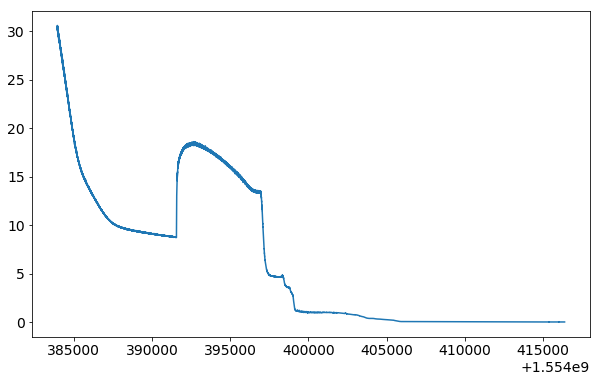

In [51]:
scanner = hk.HKArchiveScanner()
files = glob.glob('/data/15543/*.g3')
for f in files:
    scanner.process_file(f)

files2 = glob.glob('/data/15544/*.g3')
for g in files2:
    scanner.process_file(g)
    
ls_res_field = 'LSA22YG.Channel_01_R'
ls_temp_field = 'LSA22YG.Channel_01_T'

start_ls = 1554382444 + 1520
end_ls = 1554413803

arc = scanner.finalize()
lsdata_cooldown_april = arc.simple(ls_temp_field, start_ls, end_ls)
lstime_cooldown_april = lsdata_cooldown_april[0]
lstemp_cooldown_april = lsdata_cooldown_april[1]

plt.plot(lstime_cooldown_april, lstemp_cooldown_april)

## Cooldown -- Bluefors

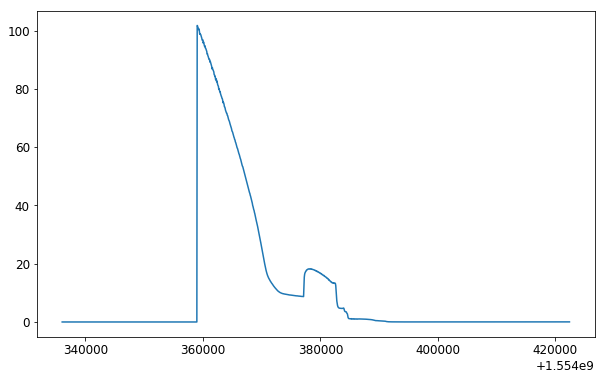

In [14]:
with open('/home/bjk49/bluefors/logs/19-04-04/CH6 T 19-04-04.log', 'r') as f:
        log_contents = f.readlines()

t_dt = []
for entry in log_contents:
    date, time, data_logfiles = entry.strip().split(',')
    t_dt.append(datetime.strptime("%s %s"%(date,time), "%d-%m-%y %H:%M:%S"))

bf_ctime = datetime2timestamps(t_dt)    
#print(len(bf_ctime))

##relevant data for 1K down to 35mK
bfstuff = np.genfromtxt('/home/bjk49/bluefors/logs/19-04-04/CH6 T 19-04-04.log', delimiter = ',')
bf_data = bfstuff[:,2]
#bf_cut_temps = bf_data[920:1136]
#bf_cut_ctime = bf_ctime[920:1136]

plt.plot(bf_ctime, bf_data)

In [15]:
#First, shift bf_ctime from EST in april 2019 to UTC (add 4 hrs)
bf_ctime_utc = []
for t in range(0, len(bf_ctime)):
    utc_bfctime = bf_ctime[t] + 4*3600
    bf_ctime_utc.append(utc_bfctime)

#Second, convert utc_ctime to datetime format
t_dt_utc = []
for ct in range(0, len(bf_ctime)):
    utc_bf_dt = datetime.utcfromtimestamp(bf_ctime_utc[ct])
    t_dt_utc.append(utc_bf_dt)

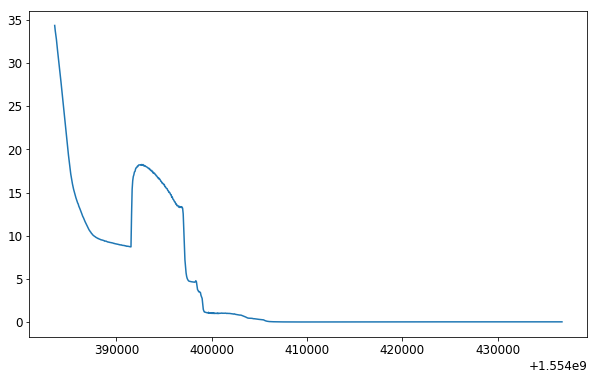

In [37]:
plt.plot(bf_ctime_utc[550:-1], bf_data[550:-1])

In [103]:
f_temps = interp1d(bf_ctime_utc[550:-1], bf_data[550:-1], fill_value = "extrapolate")
bftemps_interp_cooldown_april = f_temps(lstime_cooldown_april)
x = np.arange(0, 200)

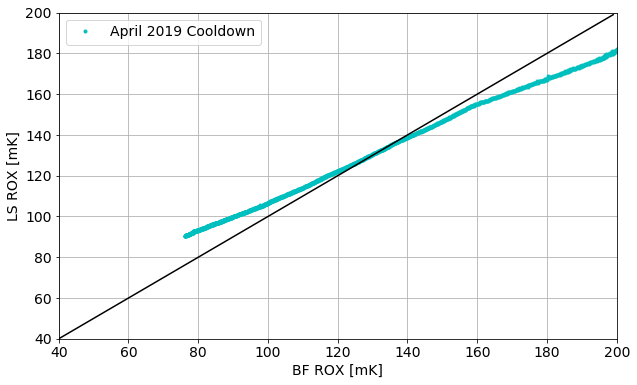

In [104]:
plt.plot(1000*bftemps_interp_cooldown_april, 1000*lstemp_cooldown_april, '.', color = 'c', label = 'April 2019 Cooldown')
plt.plot(x,x, 'k')
plt.xlabel("BF ROX [mK]")
plt.ylabel("LS ROX [mK]")
plt.grid()
plt.ylim(40, 200)
plt.xlim(40,200)
plt.legend()

## Servo -- Lakeshore

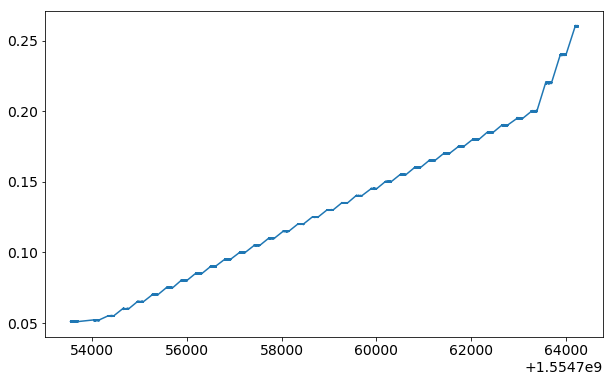

In [78]:
start_ls_servo = 1554752949
end_ls_servo = 1554761767 - 1000

scanner = hk.HKArchiveScanner()
files = glob.glob('/data/15547/*.g3')
for f in files:
    scanner.process_file(f)

ls_res_field = 'LSA22YG.Channel_01_R'
ls_temp_field = 'LSA22YG.Channel_01_T'

arc = scanner.finalize()
lsdata_servo_april = arc.simple(ls_temp_field, start_ls_servo, end_ls_servo)
lstime_servo_april = lsdata_servo_april[0]
lstemp_servo_april = lsdata_servo_april[1]

plt.plot(lstime_servo_april, lstemp_servo_april)

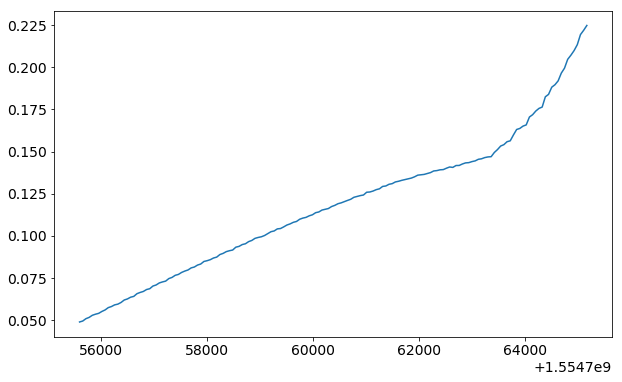

In [94]:
with open('/home/bjk49/bluefors/logs/19-04-08/CH6 T 19-04-08.log', 'r') as f:
        log_contents = f.readlines()

t_dt = []
for entry in log_contents:
    date, time, data_logfiles = entry.strip().split(',')
    t_dt.append(datetime.strptime("%s %s"%(date,time), "%d-%m-%y %H:%M:%S"))

bf_ctime_servo = datetime2timestamps(t_dt)    
#print(len(bf_ctime))

##relevant data for 1K down to 35mK
bfstuff_servo = np.genfromtxt('/home/bjk49/bluefors/logs/19-04-08/CH6 T 19-04-08.log', delimiter = ',')
bf_data_servo = bfstuff_servo[:,2]
#bf_cut_temps = bf_data[920:1136]
#bf_cut_ctime = bf_ctime[920:1136]

#First, shift bf_ctime from EST in april 2019 to UTC (add 4 hrs)
bf_ctime_utc_servo = []
for t in range(0, len(bf_ctime_servo)):
    utc_bfctime = bf_ctime_servo[t] + 4*3600
    bf_ctime_utc_servo.append(utc_bfctime)

#Second, convert utc_ctime to datetime format
t_dt_utc = []
for ct in range(0, len(bf_ctime)):
    utc_bf_dt = datetime.utcfromtimestamp(bf_ctime_utc_servo[ct])
    t_dt_utc.append(utc_bf_dt)


plt.plot(bf_ctime_utc_servo[990:1150], bf_data_servo[990:1150])

In [100]:
f_temps_servo = interp1d(bf_ctime_utc_servo[990:1150], bf_data_servo[990:1150], fill_value = "extrapolate")
bftemps_interp_servo_april = f_temps(lstime_servo_april)

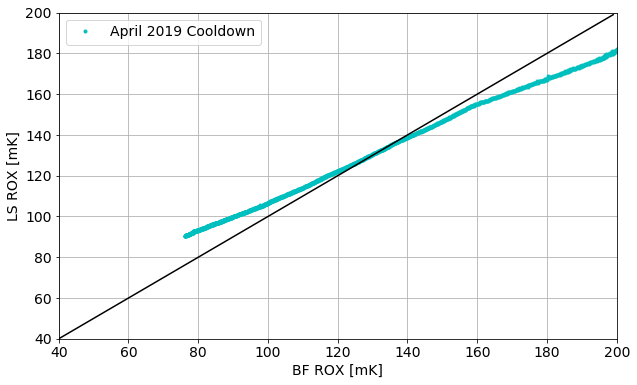

In [101]:
plt.plot(1000*bftemps_interp_cooldown_april, 1000*lstemp_cooldown_april, '.', color = 'c', label = 'April 2019 Cooldown')
plt.plot(x,x, 'k')
plt.xlabel("BF ROX [mK]")
plt.ylabel("LS ROX [mK]")
plt.grid()
plt.ylim(40, 200)
plt.xlim(40,200)
plt.legend()

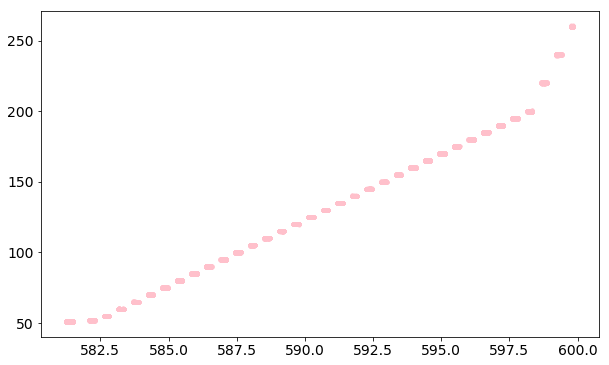

In [102]:
plt.plot(1000*bftemps_interp_servo_april, 1000*lstemp_servo_april, '.', color = 'pink', label = "April 2019 Servo")